In [13]:
import sys, math
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

In [2]:
in_file = "sfp_out_0_features1.csv"
sfp_out_0_features1 = pd.read_csv(in_file).fillna(method='ffill')
sfp_out_0_features1["bigbag_filling_time_end"] = sfp_out_0_features1.bigbag_filling_time_end.apply(lambda x: pd.Timestamp(x))
sfp_out_0_features1.tail()

,bigbag_filling_time_end,orders_details_id,bigbag_number,bigbag_filling_duration,bigbag_weight,efficiency,class,time_start,steam_preasure,dd_speed,temp_out,moisture,bulk_density,data_split,fat,p1,p2,p3,moisture2
361,2019-03-01 15:40:00,30,7,75.0,353.0,118.0,above,2019-03-01 14:25:00.000,6.25,8.15,112.0,4.68,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
362,2019-03-01 17:00:00,30,8,80.0,364.0,114.0,above,2019-03-01 15:40:00.000,6.50,8.30,112.0,4.48,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
363,2019-03-01 18:20:00,30,9,80.0,362.0,113.0,above,2019-03-01 17:00:00.000,6.50,8.30,111.0,4.56,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
364,2019-03-01 19:25:00,30,10,65.0,306.0,118.0,above,2019-03-01 18:20:00.000,6.50,8.30,111.0,4.69,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
365,2019-03-01 20:10:00,30,11,45.0,217.0,120.0,above,2019-03-01 19:25:00.000,6.50,8.30,111.0,4.90,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161


,bigbag_filling_time_end,orders_details_id,bigbag_number,bigbag_filling_duration,bigbag_weight,efficiency,class,time_start,steam_preasure,dd_speed,temp_out,moisture,bulk_density,data_split,fat,p1,p2,p3,moisture2
361,2019-03-01 15:40:00,30,7,75.0,353.0,118.0,above,2019-03-01 14:25:00.000,6.25,8.15,112.0,4.68,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
362,2019-03-01 17:00:00,30,8,80.0,364.0,114.0,above,2019-03-01 15:40:00.000,6.50,8.30,112.0,4.48,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
363,2019-03-01 18:20:00,30,9,80.0,362.0,113.0,above,2019-03-01 17:00:00.000,6.50,8.30,111.0,4.56,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
364,2019-03-01 19:25:00,30,10,65.0,306.0,118.0,above,2019-03-01 18:20:00.000,6.50,8.30,111.0,4.69,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161
365,2019-03-01 20:10:00,30,11,45.0,217.0,120.0,above,2019-03-01 19:25:00.000,6.50,8.30,111.0,4.90,190.0,test,0.058218,0.548353,0.187437,0.25259,12.4161


In [272]:
# load aggregated walc features
aggr_walc = pd.read_csv("aggregated_walc_features.csv")
aggr_walc

,Unnamed: 0,steam_pressure_at_the_inlet_of_regulation_unit,steam_pressure_at_the_inlet_of_regulation_unit.1,product_temperature_at_the_outlet_of_JetCooker,product_temperature_at_the_outlet_of_JetCooker.1,setpoint_of_steam_pressure_at_the_DD_inlet,setpoint_of_steam_pressure_at_the_DD_inlet.1,condensate_temperature_at_DD_outlet,condensate_temperature_at_DD_outlet.1,product_temperature_at_the_inlet,...,setpoint_of_product_temperature,setpoint_of_product_temperature.1,product_at_the_outlet_of_JetCooker,product_at_the_outlet_of_JetCooker.1,steam_pressure_at_the_inlet_of_JetCooker,steam_pressure_at_the_inlet_of_JetCooker.1,steam_pressure_at_the_outlet_of_regulation_unit,steam_pressure_at_the_outlet_of_regulation_unit.1,product_temperature_at_the_outlet_of_product,product_temperature_at_the_outlet_of_product.1
0,NaN,mean,std,mean,std,mean,std,mean,std,mean,...,mean,std,mean,std,mean,std,mean,std,mean,std
1,bigbag_filling_time_end,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-04 19:00:00,7.9966321794191995,0.013478983258299694,107.18639694213869,1.840662321283267,8.0,0.0,171.62777254740396,0.12986192666684537,112.44677956899007,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,74.43420085906982,1.0861437706736463,100.0,0.0
3,2018-06-04 20:35:00,7.9982576110906765,0.010752728935141427,106.31419634902687,1.90625765051978,8.0,0.0,171.56216302168997,0.10726247396656585,113.8085483885648,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,76.79318831594367,0.7108117030265428,100.0,0.0
4,2018-06-04 22:15:00,7.995656152566274,0.006126353033209355,106.93665719032288,1.493483872800336,8.0,0.0,171.53867839177448,0.10041722808851634,113.88321862220765,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,79.49308749834697,0.30088879710556826,100.0,0.0
5,2018-06-04 23:35:00,8.02497461438179,0.05477046592046373,107.12152063051862,2.52722290106804,8.03477110862732,0.07533496745950621,171.72699286142986,0.25518255871047096,113.2613098303477,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,81.5828044573466,4.1650212736584376,100.0,0.0
6,2018-06-05 01:05:00,8.191800315291793,0.0064558735436412145,108.07464301497848,1.5117016780665824,8.329861564989443,0.14793471171617578,172.5377597950123,0.07462686614835115,113.90424139234754,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,96.56645506399649,3.0229798630077043,100.0,0.0
7,2018-06-05 02:35:00,8.21419696631255,0.011649748221890447,112.44212982742874,3.9269614328630267,8.5,0.0,172.7284036989565,0.10920494463797474,113.46484027438693,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,100.0,0.0,100.0,0.0
8,2018-06-05 04:05:00,8.267021705486156,0.04004378061187787,114.94917489510995,1.4603433047654488,8.5,0.0,173.05900700887045,0.22155459662297836,112.7804211086697,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,100.0,0.0,100.0,0.0
9,2018-06-05 05:25:00,8.238867499430974,0.009540775238436308,114.33653928438822,1.8183674182755216,8.5,0.0,172.9418776512146,0.08930972716277358,112.07576834360758,...,140.0,0.0,0.0,0.0,18.96187019348144,0.0,100.0,0.0,100.0,0.0


In [45]:
sfp_out_0_features1.head()

,Unnamed: 0,bigbag_number,bigbag_filling_duration,bigbag_weight,efficiency,class,steam_preasure,dd_speed,temp_out,moisture,bulk_density,data_split,fat,p1,p2,p3,moisture2
0,1,1,100.0,409.0,102.0,optimal,8.0,7.25,118.0,3.195,240.0,training,0.060604,0.537341,0.210579,0.233674,5.753238
1,1,2,115.0,460.0,100.0,optimal,8.0,7.50,118.0,4.010,215.0,training,0.060604,0.537341,0.210579,0.233674,5.753238
2,1,3,80.0,368.0,115.0,above,8.0,7.50,118.0,4.000,200.0,training,0.060604,0.537341,0.210579,0.233674,5.753238
3,1,4,80.0,344.0,107.0,optimal,8.0,8.25,113.5,4.040,200.0,training,0.060604,0.537341,0.210579,0.233674,5.753238
4,1,5,90.0,380.0,105.0,optimal,8.2,8.50,112.0,3.840,200.0,training,0.060604,0.537341,0.210579,0.233674,5.753238


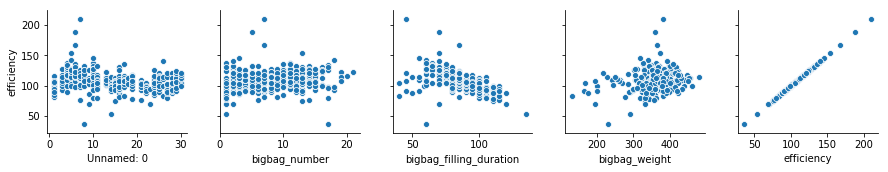

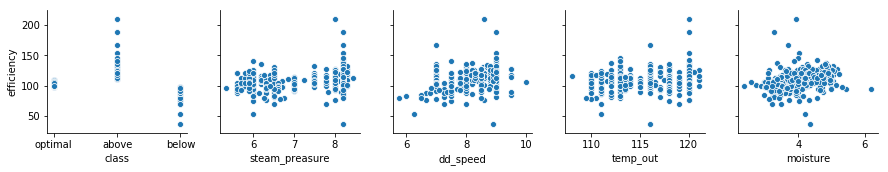

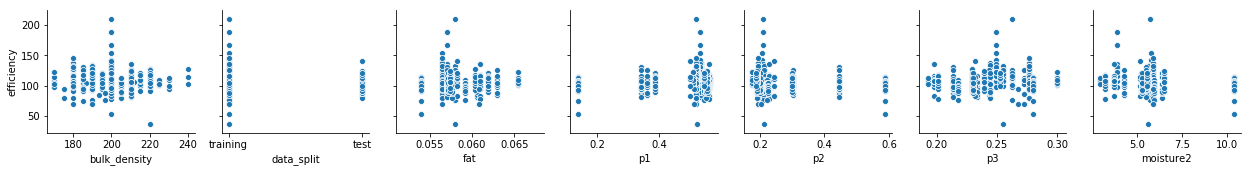

In [47]:
columns = sfp_out_0_features1.columns
sns.pairplot(sfp_out_0_features1,
             diag_kind="kde",
             x_vars=columns[:5],
             y_vars=['efficiency'])
sns.pairplot(sfp_out_0_features1,
             diag_kind="kde",
             x_vars=columns[5:10],
             y_vars=['efficiency'])
sns.pairplot(sfp_out_0_features1,
             diag_kind="kde",
             x_vars=columns[10:],
             y_vars=['efficiency'])

In [81]:
corr = sfp_out_0_features1.corr()

def corr_importance(corr, target="efficiency"):
    corr['corr_importance'] = corr[target].apply(lambda v: math.fabs(v))
    # .index.rename('feature')
    imp_df = corr[['corr_importance']].sort_values(by='corr_importance', ascending=False).drop([target])
    imp_df.index.rename('feature', inplace=True)
    return imp_df.T
    
corr_imp = corr_importance(corr)
corr_imp

feature,bigbag_filling_duration,dd_speed,steam_preasure,moisture,Unnamed: 0,p2,temp_out,p1,bigbag_weight,moisture2,p3,bigbag_number,fat,bulk_density
corr_importance,0.549789,0.40723,0.344745,0.281105,0.273048,0.226674,0.208651,0.202901,0.200519,0.189363,0.097766,0.097544,0.076727,0.046198


In [96]:
features = ["steam_preasure", "dd_speed", "temp_out", "moisture", "bulk_density", "fat", "p1", "p2", "p3", "moisture2"]
#features = ["dd_speed", "steam_preasure", "fat", "p1", "p2", "p3", "moisture2"]
#features = ["dd_speed", "steam_preasure"]

sfp_out_0_features1["class"] = sfp_out_0_features1["class"].apply(lambda x: str(x))
train_data = sfp_out_0_features1.loc[sfp_out_0_features1.data_split == "training"]
test_data = sfp_out_0_features1.loc[sfp_out_0_features1.data_split == "test"]

X_train = train_data[features]
X_test = test_data[features]

# encode labels
le = preprocessing.LabelEncoder()
le.fit(sfp_out_0_features1["class"])
y_train = le.transform(train_data["class"])
y_test = le.transform(test_data["class"])
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (293, 10)
y_train: (293,)
X_test: (73, 10)
y_test: (73,)


In [97]:
from sklearn.linear_model import LogisticRegression

# Train
clf = LogisticRegression(random_state=123, solver='lbfgs', max_iter=200, multi_class='multinomial')
#clf = LogisticRegression(C=10, dual=True, random_state=123)

estimators = []
#estimators.append(('scaler', StandardScaler()))
estimators.append(('model', clf))
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)


# Predict test set
y_pred = pipe.predict(X_test)

# Print eval report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.3698630136986301
              precision    recall  f1-score   support

       above       0.00      0.00      0.00        28
       below       0.00      0.00      0.00        18
     optimal       0.37      1.00      0.54        27

   micro avg       0.37      0.37      0.37        73
   macro avg       0.12      0.33      0.18        73
weighted avg       0.14      0.37      0.20        73



/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'prec

In [68]:
# linear regression
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('mean_squared_error:', mean_squared_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))
kfold = KFold(n_splits=10, random_state=123)
results = cross_val_score(regr, X, y, cv=2)
print(results)
print("CV MSE: %.2f (std=%.2f)" % (results.mean(), results.std()))

In [60]:
from sklearn.externals import joblib
joblib.dump(clf, "model1.pkl")

['model1.pkl']

In [87]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
y_pred = clf.fit(X_train, y_train).predict(X_test)


# Print eval report
print('Accuracy:', accuracy_score(y_test, y_pred))
#print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.3698630136986301


/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### DNNs

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import BaseWrapper

ModuleNotFoundError: No module named 'keras'

In [ ]:
def deep1(input_dim, dense_dim):
    # create model
    model = Sequential()
    model.add(Dense(dense_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def deep2(input_dim, dense_dim1, dense_dim2):
    # create model
    model = Sequential()
    model.add(Dense(dense_dim1, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_dim2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def deep3(input_dim, dense_dim1, dense_dim2, dense_dim3):
    # create model
    model = Sequential()
    model.add(Dense(dense_dim1, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_dim2, kernel_initializer='normal', activation='relu'))
    model.add(Dense(dense_dim3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def run_eval(model, epochs=100, batch_size=10, verbose=0)
    estimators = []
    estimators.append(('scaler', scaler))
    estimators.append(('model', KerasRegressor(build_fn=lambda: model, epochs=epochs, batch_size=batch_size, verbose=verbose)))
    pipe = Pipeline(estimators)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=le.classes_))

In [98]:
input_dim = X_train.shape[1]
input_dim = X_train.shape[1]
model2 = regression_deep2(input_dim, dense_dim1=input_dim, dense_dim2=2*input_dim)
run_eval(model)

10


In [163]:
df = pd.read_csv("w8_short_2.csv")
df.describe(percentiles=[.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Unnamed: 0,177653.0,1.972052e+06,1.345400e+06,399701.000000,714135.000000,1.688432e+06,3.473059e+06,3.637170e+06,3.903551e+06,4.024950e+06,4.028503e+06
Unnamed: 0.1,177653.0,1.972052e+06,1.345400e+06,399701.000000,714135.000000,1.688432e+06,3.473059e+06,3.637170e+06,3.903551e+06,4.024950e+06,4.028503e+06
steam_pressure_at_the_inlet_of_regulation_unit,177653.0,6.856613e+00,1.328648e+00,0.241251,6.092827,6.689973e+00,8.147392e+00,8.210221e+00,8.225667e+00,8.305043e+00,8.583665e+00
product_temperature_at_the_outlet_of_JetCooker,177653.0,1.120857e+02,1.826349e+01,0.000000,113.473480,1.166201e+02,1.190723e+02,1.205479e+02,1.209603e+02,1.245626e+02,1.277309e+02
setpoint_of_steam_pressure_at_the_DD_inlet,177653.0,6.887027e+00,1.357898e+00,0.300000,6.100000,6.700000e+00,8.200000e+00,8.300000e+00,8.500000e+00,8.500000e+00,8.500000e+00
condensate_temperature_at_DD_outlet,177653.0,1.642228e+02,1.286887e+01,0.000000,161.193542,1.648393e+02,1.711180e+02,1.720729e+02,1.725937e+02,1.730277e+02,1.734907e+02
product_temperature_at_the_inlet,177653.0,1.120354e+02,1.716762e+01,0.000000,112.193130,1.154482e+02,1.177268e+02,1.201790e+02,1.206347e+02,1.286857e+02,1.293585e+02
setpoint_of_product_temperature,177653.0,1.381863e+02,4.940800e+00,130.000000,130.000000,1.400000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02,1.420000e+02
product_at_the_outlet_of_JetCooker,177653.0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
steam_pressure_at_the_inlet_of_JetCooker,177653.0,1.896176e+01,4.498781e-02,0.000000,18.961870,1.896187e+01,1.896187e+01,1.896187e+01,1.896187e+01,1.896187e+01,1.896187e+01


In [164]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'timestamp',
       'steam_pressure_at_the_inlet_of_regulation_unit',
       'product_temperature_at_the_outlet_of_JetCooker',
       'setpoint_of_steam_pressure_at_the_DD_inlet',
       'condensate_temperature_at_DD_outlet',
       'product_temperature_at_the_inlet', 'setpoint_of_product_temperature',
       'product_at_the_outlet_of_JetCooker',
       'steam_pressure_at_the_inlet_of_JetCooker',
       'steam_pressure_at_the_outlet_of_regulation_unit',
       'product_temperature_at_the_outlet_of_product', 'OK',
       'bigbag_filling_time_end'],
      dtype='object')

In [283]:
#dd_aver = processing_details_dd.groupby("bigbag_filling_time_end").agg({"steam_preasure":np.mean, 'dd_speed':np.mean, 'temp_out':np.mean})
aggr = df.groupby('bigbag_filling_time_end').agg({
    "steam_pressure_at_the_inlet_of_regulation_unit":[np.mean, np.std],
    'product_temperature_at_the_outlet_of_JetCooker':[np.mean, np.std],
    'setpoint_of_steam_pressure_at_the_DD_inlet':[np.mean, np.std],
    'condensate_temperature_at_DD_outlet':[np.mean, np.std],
    'product_temperature_at_the_inlet':[np.mean, np.std],
    'setpoint_of_product_temperature':[np.mean, np.std],
    'product_at_the_outlet_of_JetCooker':[np.mean, np.std],
    'steam_pressure_at_the_inlet_of_JetCooker':[np.mean, np.std],
    'steam_pressure_at_the_outlet_of_regulation_unit':[np.mean, np.std],
    'product_temperature_at_the_outlet_of_product':[np.mean, np.std]})
    
aggr = aggr.reset_index()
aggr["bigbag_filling_time_end"] = aggr.bigbag_filling_time_end.apply(lambda x: pd.Timestamp(x))
aggr.head()

bigbag_filling_time_end steam_pressure_at_the_inlet_of_regulation_unit  \
                                                                    mean   
0     2018-06-04 19:00:00                                       7.996632   
1     2018-06-04 20:35:00                                       7.998258   
2     2018-06-04 22:15:00                                       7.995656   
3     2018-06-04 23:35:00                                       8.024975   
4     2018-06-05 01:05:00                                       8.191800   

            product_temperature_at_the_outlet_of_JetCooker            \
        std                                           mean       std   
0  0.013479                                     107.186397  1.840662   
1  0.010753                                     106.314196  1.906258   
2  0.006126                                     106.936657  1.493484   
3  0.054770                                     107.121521  2.527223   
4  0.006456                                     108.074643  1.511702   

  setpoint_of_steam_pressure_at_the_DD_inlet            \
                                        mean       std   
0                                   8.000000  0.000000   
1                                   8.000000  0.000000   
2                                   8.000000  0.000000   
3                                   8.034771  0.075335   
4                                   8.329862  0.147935   

  condensate_temperature_at_DD_outlet            \
                                 mean       std   
0                          171.627773  0.129862   
1                          171.562163  0.107262   
2                          171.538678  0.100417   
3                          171.726993  0.255183   
4                          172.537760  0.074627   

  product_temperature_at_the_inlet  ... setpoint_of_product_temperature       \
                              mean  ...                            mean  std   
0                       112.446780  ...                           140.0  0.0   
1                       113.808548  ...                           140.0  0.0   
2                       113.883219  ...                           140.0  0.0   
3                       113.261310  ...                           140.0  0.0   
4                       113.904241  ...                           140.0  0.0   

  product_at_the_outlet_of_JetCooker       \
                                mean  std   
0                                0.0  0.0   
1                                0.0  0.0   
2                                0.0  0.0   
3                                0.0  0.0   
4                                0.0  0.0   

  steam_pressure_at_the_inlet_of_JetCooker       \
                                      mean  std   
0                                 18.96187  0.0   
1                                 18.96187  0.0   
2                                 18.96187  0.0   
3                                 18.96187  0.0   
4                                 18.96187  0.0   

  steam_pressure_at_the_outlet_of_regulation_unit            \
                                             mean       std   
0                                       74.434201  1.086144   
1                                       76.793188  0.710812   
2                                       79.493087  0.300889   
3                                       81.582804  4.165021   
4                                       96.566455  3.022980   

  product_temperature_at_the_outlet_of_product       
                                          mean  std  
0                                        100.0  0.0  
1                                        100.0  0.0  
2                                        100.0  0.0  
3                                        100.0  0.0  
4                                        100.0  0.0  

[5 rows x 21 columns]

In [280]:
end_dates = pd.read_csv('start_end_times.csv', usecols=['bigbag_filling_time_end'])
end_dates['bigbag_filling_time_end'] = end_dates['bigbag_filling_time_end'].apply(lambda x: pd.Timestamp(x))
end_dates.head()

,bigbag_filling_time_end
0,2018-06-04 19:00:00
1,2018-06-04 20:35:00
2,2018-06-04 22:15:00
3,2018-06-04 23:35:00
4,2018-06-05 01:05:00


In [216]:
end_dates_rev = end_dates.reset_index().set_index("bigbag_filling_time_end")
end_dates_rev.head()

,index
bigbag_filling_time_end,
2018-06-04 19:00:00,0
2018-06-04 20:35:00,1
2018-06-04 22:15:00,2
2018-06-04 23:35:00,3
2018-06-05 01:05:00,4


In [218]:
aggr = aggr.join(end_dates_rev)

/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [220]:
#aggr.to_csv("aggregated_walc_features.csv")
aggr2 = aggr.reset_index()
aggr2.head()

,bigbag_filling_time_end,"(steam_pressure_at_the_inlet_of_regulation_unit, mean)","(steam_pressure_at_the_inlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_JetCooker, mean)","(product_temperature_at_the_outlet_of_JetCooker, std)","(setpoint_of_steam_pressure_at_the_DD_inlet, mean)","(setpoint_of_steam_pressure_at_the_DD_inlet, std)","(condensate_temperature_at_DD_outlet, mean)","(condensate_temperature_at_DD_outlet, std)","(product_temperature_at_the_inlet, mean)",...,"(setpoint_of_product_temperature, std)","(product_at_the_outlet_of_JetCooker, mean)","(product_at_the_outlet_of_JetCooker, std)","(steam_pressure_at_the_inlet_of_JetCooker, mean)","(steam_pressure_at_the_inlet_of_JetCooker, std)","(steam_pressure_at_the_outlet_of_regulation_unit, mean)","(steam_pressure_at_the_outlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_product, mean)","(product_temperature_at_the_outlet_of_product, std)",index
0,2018-06-04 19:00:00,7.996632,0.013479,107.186397,1.840662,8.000000,0.000000,171.627773,0.129862,112.446780,...,0.0,0.0,0.0,18.96187,0.0,74.434201,1.086144,100.0,0.0,0
1,2018-06-04 20:35:00,7.998258,0.010753,106.314196,1.906258,8.000000,0.000000,171.562163,0.107262,113.808548,...,0.0,0.0,0.0,18.96187,0.0,76.793188,0.710812,100.0,0.0,1
2,2018-06-04 22:15:00,7.995656,0.006126,106.936657,1.493484,8.000000,0.000000,171.538678,0.100417,113.883219,...,0.0,0.0,0.0,18.96187,0.0,79.493087,0.300889,100.0,0.0,2
3,2018-06-04 23:35:00,8.024975,0.054770,107.121521,2.527223,8.034771,0.075335,171.726993,0.255183,113.261310,...,0.0,0.0,0.0,18.96187,0.0,81.582804,4.165021,100.0,0.0,3
4,2018-06-05 01:05:00,8.191800,0.006456,108.074643,1.511702,8.329862,0.147935,172.537760,0.074627,113.904241,...,0.0,0.0,0.0,18.96187,0.0,96.566455,3.022980,100.0,0.0,4


In [250]:
aggr2[('steam_pressure_at_the_inlet_of_regulation_unit', 'mean')].iloc[0]
aggr.head()

,"(steam_pressure_at_the_inlet_of_regulation_unit, mean)","(steam_pressure_at_the_inlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_JetCooker, mean)","(product_temperature_at_the_outlet_of_JetCooker, std)","(setpoint_of_steam_pressure_at_the_DD_inlet, mean)","(setpoint_of_steam_pressure_at_the_DD_inlet, std)","(condensate_temperature_at_DD_outlet, mean)","(condensate_temperature_at_DD_outlet, std)","(product_temperature_at_the_inlet, mean)","(product_temperature_at_the_inlet, std)",...,"(setpoint_of_product_temperature, std)","(product_at_the_outlet_of_JetCooker, mean)","(product_at_the_outlet_of_JetCooker, std)","(steam_pressure_at_the_inlet_of_JetCooker, mean)","(steam_pressure_at_the_inlet_of_JetCooker, std)","(steam_pressure_at_the_outlet_of_regulation_unit, mean)","(steam_pressure_at_the_outlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_product, mean)","(product_temperature_at_the_outlet_of_product, std)",index
bigbag_filling_time_end,,,,,,,,,,,,,,,,,,,,,
2018-06-04 19:00:00,7.996632,0.013479,107.186397,1.840662,8.000000,0.000000,171.627773,0.129862,112.446780,1.731179,...,0.0,0.0,0.0,18.96187,0.0,74.434201,1.086144,100.0,0.0,0
2018-06-04 20:35:00,7.998258,0.010753,106.314196,1.906258,8.000000,0.000000,171.562163,0.107262,113.808548,0.962804,...,0.0,0.0,0.0,18.96187,0.0,76.793188,0.710812,100.0,0.0,1
2018-06-04 22:15:00,7.995656,0.006126,106.936657,1.493484,8.000000,0.000000,171.538678,0.100417,113.883219,0.530128,...,0.0,0.0,0.0,18.96187,0.0,79.493087,0.300889,100.0,0.0,2
2018-06-04 23:35:00,8.024975,0.054770,107.121521,2.527223,8.034771,0.075335,171.726993,0.255183,113.261310,1.184996,...,0.0,0.0,0.0,18.96187,0.0,81.582804,4.165021,100.0,0.0,3
2018-06-05 01:05:00,8.191800,0.006456,108.074643,1.511702,8.329862,0.147935,172.537760,0.074627,113.904241,0.503557,...,0.0,0.0,0.0,18.96187,0.0,96.566455,3.022980,100.0,0.0,4


In [182]:
sfp_out_0_features1.head()

,bigbag_filling_time_end,orders_details_id,bigbag_number,bigbag_filling_duration,bigbag_weight,efficiency,class,time_start,steam_preasure,dd_speed,temp_out,moisture,bulk_density,data_split,fat,p1,p2,p3,moisture2
0,2018-06-04 19:00:00.000,1,1,100.0,409.0,102.0,optimal,2018-06-04 17:20:00.000,NaN,NaN,NaN,NaN,NaN,training,0.060604,0.537341,0.210579,0.233674,11.4533
1,2018-06-04 20:35:00.000,1,2,115.0,460.0,100.0,optimal,2018-06-04 18:40:00.000,8.0,7.50,118.0,4.01,215.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
2,2018-06-04 22:15:00.000,1,3,80.0,368.0,115.0,above,2018-06-04 20:55:00.000,8.0,7.50,118.0,4.00,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
3,2018-06-04 23:35:00.000,1,4,80.0,344.0,107.0,optimal,2018-06-04 22:15:00.000,8.0,8.25,113.5,4.04,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
4,2018-06-05 01:05:00.000,1,5,90.0,380.0,105.0,optimal,2018-06-04 23:35:00.000,8.2,8.50,112.0,3.84,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533


In [ ]:
aggr2.loc[aggr2.bigbag_filling_time_end == x][col]

In [304]:
for col in aggr2.columns.values[1:]:
    #print(col)
    #print(aggr2.loc[aggr2.bigbag_filling_time_end == '2018-06-04 19:00:00.000'][col])
    #col_joined = '_'.join(col)
    sfp_out_0_features1[col_joined] = sfp_out_0_features1.bigbag_filling_time_end.apply(lambda x: aggr2.loc[aggr2.bigbag_filling_time_end == x][col])

ValueError: Wrong number of items passed 357, placement implies 1

In [263]:
aggr2.set_index('bigbag_filling_time_end')
aggr2.head()

,bigbag_filling_time_end,"(steam_pressure_at_the_inlet_of_regulation_unit, mean)","(steam_pressure_at_the_inlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_JetCooker, mean)","(product_temperature_at_the_outlet_of_JetCooker, std)","(setpoint_of_steam_pressure_at_the_DD_inlet, mean)","(setpoint_of_steam_pressure_at_the_DD_inlet, std)","(condensate_temperature_at_DD_outlet, mean)","(condensate_temperature_at_DD_outlet, std)","(product_temperature_at_the_inlet, mean)",...,"(setpoint_of_product_temperature, std)","(product_at_the_outlet_of_JetCooker, mean)","(product_at_the_outlet_of_JetCooker, std)","(steam_pressure_at_the_inlet_of_JetCooker, mean)","(steam_pressure_at_the_inlet_of_JetCooker, std)","(steam_pressure_at_the_outlet_of_regulation_unit, mean)","(steam_pressure_at_the_outlet_of_regulation_unit, std)","(product_temperature_at_the_outlet_of_product, mean)","(product_temperature_at_the_outlet_of_product, std)",index
0,2018-06-04 19:00:00,7.996632,0.013479,107.186397,1.840662,8.000000,0.000000,171.627773,0.129862,112.446780,...,0.0,0.0,0.0,18.96187,0.0,74.434201,1.086144,100.0,0.0,0
1,2018-06-04 20:35:00,7.998258,0.010753,106.314196,1.906258,8.000000,0.000000,171.562163,0.107262,113.808548,...,0.0,0.0,0.0,18.96187,0.0,76.793188,0.710812,100.0,0.0,1
2,2018-06-04 22:15:00,7.995656,0.006126,106.936657,1.493484,8.000000,0.000000,171.538678,0.100417,113.883219,...,0.0,0.0,0.0,18.96187,0.0,79.493087,0.300889,100.0,0.0,2
3,2018-06-04 23:35:00,8.024975,0.054770,107.121521,2.527223,8.034771,0.075335,171.726993,0.255183,113.261310,...,0.0,0.0,0.0,18.96187,0.0,81.582804,4.165021,100.0,0.0,3
4,2018-06-05 01:05:00,8.191800,0.006456,108.074643,1.511702,8.329862,0.147935,172.537760,0.074627,113.904241,...,0.0,0.0,0.0,18.96187,0.0,96.566455,3.022980,100.0,0.0,4


In [284]:
#sfp_out_0_features1 = sfp_out_0_features1.set_index('bigbag_filling_time_end')
sfp_out_0_features1.head()

,bigbag_filling_time_end,orders_details_id,bigbag_number,bigbag_filling_duration,bigbag_weight,efficiency,class,time_start,steam_preasure,dd_speed,temp_out,moisture,bulk_density,data_split,fat,p1,p2,p3,moisture2
0,2018-06-04 19:00:00,1,1,100.0,409.0,102.0,optimal,2018-06-04 17:20:00.000,NaN,NaN,NaN,NaN,NaN,training,0.060604,0.537341,0.210579,0.233674,11.4533
1,2018-06-04 20:35:00,1,2,115.0,460.0,100.0,optimal,2018-06-04 18:40:00.000,8.0,7.50,118.0,4.01,215.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
2,2018-06-04 22:15:00,1,3,80.0,368.0,115.0,above,2018-06-04 20:55:00.000,8.0,7.50,118.0,4.00,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
3,2018-06-04 23:35:00,1,4,80.0,344.0,107.0,optimal,2018-06-04 22:15:00.000,8.0,8.25,113.5,4.04,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533
4,2018-06-05 01:05:00,1,5,90.0,380.0,105.0,optimal,2018-06-04 23:35:00.000,8.2,8.50,112.0,3.84,200.0,training,0.060604,0.537341,0.210579,0.233674,11.4533


In [297]:
merged = aggr.set_index("bigbag_filling_time_end").join(sfp_out_0_features1.set_index("bigbag_filling_time_end"))
merged.shape

/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


(357, 38)

In [300]:
merged.tail().data_split

bigbag_filling_time_end
2019-03-01 15:40:00    test
2019-03-01 17:00:00    test
2019-03-01 18:20:00    test
2019-03-01 19:25:00    test
2019-03-01 20:10:00    test
Name: data_split, dtype: object

In [3]:
merged.to_csv("merged_data.csv")

NameError: name 'merged' is not defined

NameError: name 'merged' is not defined

In [4]:
merged = pd.read_csv("merged_data.csv")
features = ["steam_preasure", "dd_speed", "temp_out", "moisture", "bulk_density", "fat", "p1", "p2", "p3", "moisture2"]
#features = ["dd_speed", "steam_preasure", "fat", "p1", "p2", "p3", "moisture2"]
#features = ["dd_speed", "steam_preasure"]

#merged["class"] = merged["class"].apply(lambda x: str(x))
train_data = merged.loc[merged.data_split == "training"]
test_data = merged.loc[merged.data_split == "test"]

X_train = train_data[features]
X_test = test_data[features]

# encode labels
le = preprocessing.LabelEncoder()
le.fit(merged["class"])
y_train = le.transform(train_data["class"])
y_test = le.transform(test_data["class"])
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (284, 10)
y_train: (284,)
X_test: (73, 10)
y_test: (73,)
X_train: (284, 10)
y_train: (284,)
X_test: (73, 10)
y_test: (73,)


In [9]:
merged.columns.values

array(['bigbag_filling_time_end',
       "('steam_pressure_at_the_inlet_of_regulation_unit', 'mean')",
       "('steam_pressure_at_the_inlet_of_regulation_unit', 'std')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'mean')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'std')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'mean')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'std')",
       "('condensate_temperature_at_DD_outlet', 'mean')",
       "('condensate_temperature_at_DD_outlet', 'std')",
       "('product_temperature_at_the_inlet', 'mean')",
       "('product_temperature_at_the_inlet', 'std')",
       "('setpoint_of_product_temperature', 'mean')",
       "('setpoint_of_product_temperature', 'std')",
       "('product_at_the_outlet_of_JetCooker', 'mean')",
       "('product_at_the_outlet_of_JetCooker', 'std')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'mean')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'st

In [5]:
features = ["('steam_pressure_at_the_inlet_of_regulation_unit', 'mean')",
       "('steam_pressure_at_the_inlet_of_regulation_unit', 'std')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'mean')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'std')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'mean')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'std')",
       "('condensate_temperature_at_DD_outlet', 'mean')",
       "('condensate_temperature_at_DD_outlet', 'std')",
       "('product_temperature_at_the_inlet', 'mean')",
       "('product_temperature_at_the_inlet', 'std')",
       "('setpoint_of_product_temperature', 'mean')",
       "('setpoint_of_product_temperature', 'std')",
       "('product_at_the_outlet_of_JetCooker', 'mean')",
       "('product_at_the_outlet_of_JetCooker', 'std')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'mean')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'std')",
       "('steam_pressure_at_the_outlet_of_regulation_unit', 'mean')",
       "('steam_pressure_at_the_outlet_of_regulation_unit', 'std')",
       "('product_temperature_at_the_outlet_of_product', 'mean')",
       "('product_temperature_at_the_outlet_of_product', 'std')",
       'steam_preasure', 'dd_speed', 'temp_out', 'moisture',
       'bulk_density', 'fat', 'p1', 'p2', 'p3', 'moisture2']

merged.fillna(merged.mean(), inplace=True) 

train_data = merged.loc[merged.data_split == "training"]
test_data = merged.loc[merged.data_split == "test"]


#poly = PolynomialFeatures(2)
#train_data = poly.fit_transform(X)

X_train = train_data[features]
X_test = test_data[features]

# encode labels
le = preprocessing.LabelEncoder()
le.fit(merged["class"])
y_train = le.transform(train_data["class"])
y_test = le.transform(test_data["class"])
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (284, 30)
y_train: (284,)
X_test: (73, 30)
y_test: (73,)
X_train: (284, 30)
y_train: (284,)
X_test: (73, 30)
y_test: (73,)


In [18]:
from sklearn.linear_model import LogisticRegression

# Train
clf = LogisticRegression(random_state=123, solver='lbfgs', max_iter=500, multi_class='multinomial')
#clf = LogisticRegression(C=10, dual=True, random_state=123)

estimators = []
#estimators.append(('scaler', StandardScaler()))
estimators.append(('model', clf))
pipe = Pipeline(estimators)
pipe.fit(X_train, y_train)

# Predict test set
y_pred = pipe.predict(X_test)

# Print eval report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

       above       0.57      0.61      0.59        28
       below       0.50      0.11      0.18        18
     optimal       0.46      0.67      0.55        27

   micro avg       0.51      0.51      0.51        73
   macro avg       0.51      0.46      0.44        73
weighted avg       0.51      0.51      0.47        73

Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

       above       0.57      0.61      0.59        28
       below       0.50      0.11      0.18        18
     optimal       0.46      0.67      0.55        27

   micro avg       0.51      0.51      0.51        73
   macro avg       0.51      0.46      0.44        73
weighted avg       0.51      0.51      0.47        73



/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/hack/anaconda3/envs/innovagile/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
from sklearn.externals import joblib
model = joblib.load("model2.pkl")

In [12]:
from sklearn.externals import joblib
model = joblib.load("model2.pkl")

y_pred = model.predict(X_test)

# Print eval report
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

       above       0.57      0.61      0.59        28
       below       0.50      0.11      0.18        18
     optimal       0.46      0.67      0.55        27

   micro avg       0.51      0.51      0.51        73
   macro avg       0.51      0.46      0.44        73
weighted avg       0.51      0.51      0.47        73

Accuracy: 0.5068493150684932
              precision    recall  f1-score   support

       above       0.57      0.61      0.59        28
       below       0.50      0.11      0.18        18
     optimal       0.46      0.67      0.55        27

   micro avg       0.51      0.51      0.51        73
   macro avg       0.51      0.46      0.44        73
weighted avg       0.51      0.51      0.47        73



### Regression train/test

In [5]:
features = ["('steam_pressure_at_the_inlet_of_regulation_unit', 'mean')",
       "('steam_pressure_at_the_inlet_of_regulation_unit', 'std')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'mean')",
       "('product_temperature_at_the_outlet_of_JetCooker', 'std')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'mean')",
       "('setpoint_of_steam_pressure_at_the_DD_inlet', 'std')",
       "('condensate_temperature_at_DD_outlet', 'mean')",
       "('condensate_temperature_at_DD_outlet', 'std')",
       "('product_temperature_at_the_inlet', 'mean')",
       "('product_temperature_at_the_inlet', 'std')",
       "('setpoint_of_product_temperature', 'mean')",
       "('setpoint_of_product_temperature', 'std')",
       "('product_at_the_outlet_of_JetCooker', 'mean')",
       "('product_at_the_outlet_of_JetCooker', 'std')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'mean')",
       "('steam_pressure_at_the_inlet_of_JetCooker', 'std')",
       "('steam_pressure_at_the_outlet_of_regulation_unit', 'mean')",
       "('steam_pressure_at_the_outlet_of_regulation_unit', 'std')",
       "('product_temperature_at_the_outlet_of_product', 'mean')",
       "('product_temperature_at_the_outlet_of_product', 'std')",
       'steam_preasure', 'dd_speed', 'temp_out', 'moisture',
       'fat', 'p1', 'p2', 'p3', 'moisture2']

#poly = PolynomialFeatures(2)
#train_data = poly.fit_transform(X)

X_train = train_data[features]
X_test = test_data[features]

y1_train = train_data["bulk_density"]
y1_test = le.transform(test_data["bulk_density"])


y2_train = train_data["moisture"]
y2_test = le.transform(test_data["moisture"])

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

NameError: name 'train_data' is not defined